<a href="https://colab.research.google.com/github/YogeshPandey29/Projects/blob/master/Classification_of_IRIS_Dataset_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, I have implemented the classification of IRIS dataset using Logistic Regression. The IRIS dataset is one of the popular sets of training examples which contain various features of a flower belonging to the IRIS class. The features include sepal length, sepal width, petal length and petal width and the our aim is to classify each of the flowers into one of the three given classes (Setosa, Virginca and Versicolor).
I have made use of scikit-learn library of python in order to create a Logistic Regression model to classify the dataset.

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("iris dataset.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
X = data.iloc[:, 0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
y = data.iloc[:, 4]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

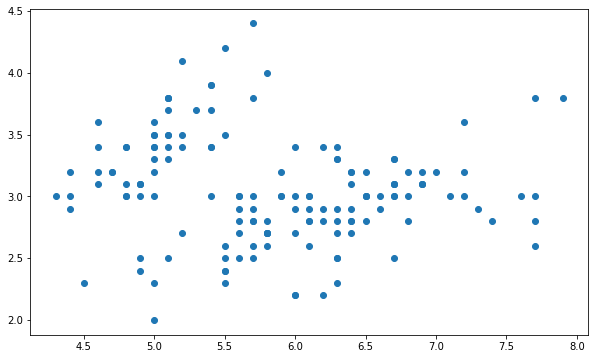

In [14]:
plt.figure(figsize = (10, 6))
plt.scatter(data[['sepal_length']], data[['sepal_width']])
plt.show()

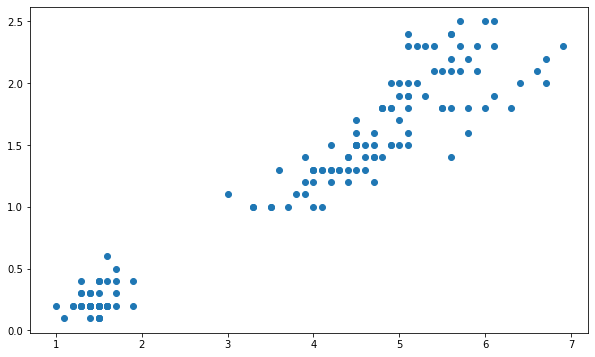

In [15]:
plt.figure(figsize = (10, 6))
plt.scatter(data[['petal_length']], data[['petal_width']])
plt.show()

In [16]:
y.value_counts()        #count of total number of flowers belonging to each of the class (50 in each of the three of them)

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [17]:
y.unique()              #to realize how many different classes are there in the dataset (3 in this case)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)                   #encoding the categorical values of the species feature ('y') into numeric values using Label Encoder

In [33]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(X_train, y_train)

     sepal_length  sepal_width  petal_length  petal_width
17            5.1          3.5           1.4          0.3
86            6.7          3.1           4.7          1.5
66            5.6          3.0           4.5          1.5
110           6.5          3.2           5.1          2.0
126           6.2          2.8           4.8          1.8
..            ...          ...           ...          ...
48            5.3          3.7           1.5          0.2
9             4.9          3.1           1.5          0.1
57            4.9          2.4           3.3          1.0
72            6.3          2.5           4.9          1.5
59            5.2          2.7           3.9          1.4

[120 rows x 4 columns] [0 1 1 2 2 0 0 2 0 1 2 0 2 2 2 1 1 2 0 1 1 0 0 2 2 0 1 2 0 2 1 2 2 1 2 2 0
 0 1 1 2 0 0 0 1 0 2 1 0 0 1 1 2 2 1 0 1 1 1 1 1 0 2 0 1 0 2 2 2 2 2 0 0 1
 0 2 0 0 1 0 2 2 2 2 0 1 1 0 2 2 0 2 0 0 1 1 0 1 1 1 2 2 0 0 0 1 1 0 0 1 0
 1 1 2 1 0 0 1 1 1]


In [30]:
print(X_test, y_test)

     sepal_length  sepal_width  petal_length  petal_width
92            5.8          2.6           4.0          1.2
76            6.8          2.8           4.8          1.4
2             4.7          3.2           1.3          0.2
130           7.4          2.8           6.1          1.9
91            6.1          3.0           4.6          1.4
79            5.7          2.6           3.5          1.0
27            5.2          3.5           1.5          0.2
10            5.4          3.7           1.5          0.2
7             5.0          3.4           1.5          0.2
38            4.4          3.0           1.3          0.2
55            5.7          2.8           4.5          1.3
58            6.6          2.9           4.6          1.3
111           6.4          2.7           5.3          1.9
124           6.7          3.3           5.7          2.1
149           5.9          3.0           5.1          1.8
117           7.7          3.8           6.7          2.2
108           

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 200)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
print(classifier.coef_)

[[-0.37743723  0.90621721 -2.37045138 -1.03731137]
 [ 0.50878404 -0.35736616 -0.16682646 -0.78698604]
 [-0.13134681 -0.54885106  2.53727784  1.82429741]]


In [37]:
print(classifier.intercept_)

[  9.08208624   1.98322945 -11.06531569]


In [40]:
y_predicted = classifier.predict(X_test)
print(y_predicted)

[1 1 0 2 1 1 0 0 0 0 1 1 2 2 2 2 2 0 2 2 2 2 2 1 1 2 2 0 0 2]


In [45]:
from sklearn import metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

0.18257418583505536


In [47]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_predicted)
print(score)                                    #thsi classification model has an accuracy score of 96.6% (which is significantly good)

0.9666666666666667


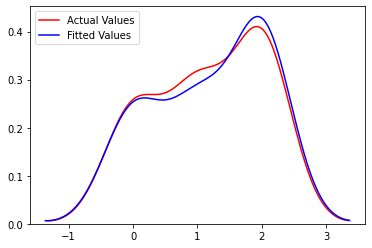

In [49]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Values")
sns.distplot(y_predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)

In [50]:
from sklearn.metrics import confusion_matrix
cnf_mtrx = confusion_matrix(y_test, y_predicted)
print(cnf_mtrx)

[[ 8  0  0]
 [ 0  8  1]
 [ 0  0 13]]


In [57]:
sample_values1 = np.array([[4.8, 3.6, 3.3, 0.3]])
res1 = classifier.predict(sample_values)
print(res1)

[0]


In [58]:
sample_values2 = np.array([[5.6, 4.2, 1.3, 0.8]])
res2 = classifier.predict(sample_values2)
print(res2)

[0]


In [59]:
sample_values3 = np.array([[6.8, 3.2, 5.9, 2.3]])
res3 = classifier.predict(sample_values3)
print(res3)

[2]
